In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
df=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(42000, 785)

In [5]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
21554,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
import matplotlib.pyplot as plt

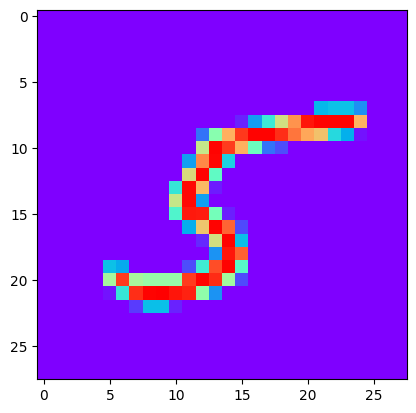

In [7]:
plt.imshow(df.iloc[35200,1:].values.reshape(28,28),cmap="rainbow")

In [8]:
X=df.iloc[:,1:]
y=df.iloc[:,:1]

In [9]:
X

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
y

,label
0,1
1,0
2,1
3,4
4,0
...,...
41995,0
41996,1
41997,7
41998,6


In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
X_train.shape

(33600, 784)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn=KNeighborsClassifier()

In [15]:
knn.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [16]:
y_pred=knn.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [19]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [20]:
from sklearn.decomposition import PCA
pca=PCA(n_components=200)

In [21]:
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [22]:
X_train_trf.shape

(33600, 200)

In [23]:
knn=KNeighborsClassifier()

In [24]:
knn.fit(X_train_trf,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [25]:
y_pred=knn.predict(X_test_trf)

In [26]:
accuracy_score(y_test,y_pred)

0.9504761904761905

In [27]:
pca=PCA(n_components=2)
X_train_trf=pca.fit_transform(X_train)
X_train_trf=pca.transform(X_test)

In [28]:
X_train_trf

array([[-5.00669438, -2.63016739],
       [-7.757799  , -1.47425474],
       [-7.47286211,  1.61813159],
       ...,
       [ 2.40771041, -1.55000962],
       [10.55730912, -2.46741887],
       [-3.42369276,  5.09422535]])

In [29]:
y_train.shape

(33600, 1)

In [30]:
import plotly.express as px

# Fix shape mismatch and convert labels to string
y_train_trf = y_train[:X_train_trf.shape[0]].values.ravel().astype(str)

# Plot
fig = px.scatter(
    x=X_train_trf[:, 0],
    y=X_train_trf[:, 1], 
    color=y_train_trf,
    color_discrete_sequence=px.colors.qualitative.G10
)

fig.show()


In [31]:
pca=PCA(n_components=3)
X_train_trf=pca.fit_transform(X_train)
X_train_trf=pca.transform(X_test)

In [32]:
import plotly.express as px

# Ensure labels are 1D and match X_train_trf length
y_train_trf = y_train[:X_train_trf.shape[0]].values.ravel().astype(str)

# Create 3D scatter plot with labels as color
fig = px.scatter_3d(
    x=X_train_trf[:, 0],
    y=X_train_trf[:, 1],
    z=X_train_trf[:, 2],
    color=y_train_trf,
    color_discrete_sequence=px.colors.qualitative.G10,
    labels={'color': 'Digit'}
)

# Optional: tighten margins
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20)
)

fig.show()


In [33]:
# Eigen Values
pca.explained_variance_

array([40.67111197, 29.170234  , 26.74459554])

In [34]:
# Eigen Vector
pca.components_

array([[-9.94030570e-19,  1.28406682e-18,  1.82339762e-19, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-1.23303756e-17,  6.14466921e-18, -4.79467982e-19, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.74402025e-17, -2.23568149e-17, -5.28584544e-18, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [35]:
pca.components_.shape

(3, 784)

In [36]:
pca=PCA(n_components=None)
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [37]:
pca.explained_variance_.shape

(784,)

In [38]:
pca.components_.shape

(784, 784)

In [39]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

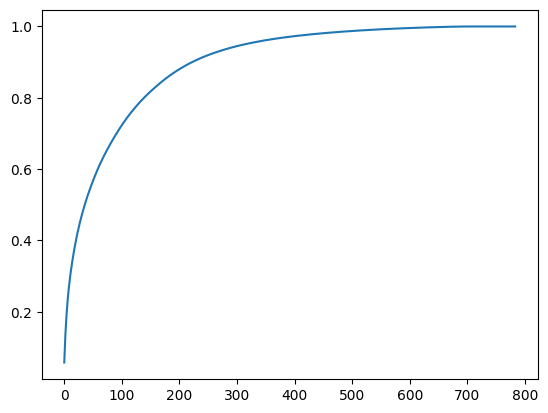

In [40]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))